<a href="https://colab.research.google.com/github/Abdullahali77/NTI_ML/blob/main/K_Means_MallCustomers.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [178]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [179]:
df = pd.read_csv('Mall_Customers.csv')

In [180]:
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [181]:
# drop id
df.drop('CustomerID', axis=1, inplace=True)

In [182]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Gender                  200 non-null    object
 1   Age                     200 non-null    int64 
 2   Annual Income (k$)      200 non-null    int64 
 3   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(3), object(1)
memory usage: 6.4+ KB


In [183]:
df.isna().sum()

,0
Gender,0
Age,0
Annual Income (k$),0
Spending Score (1-100),0


<Axes: >

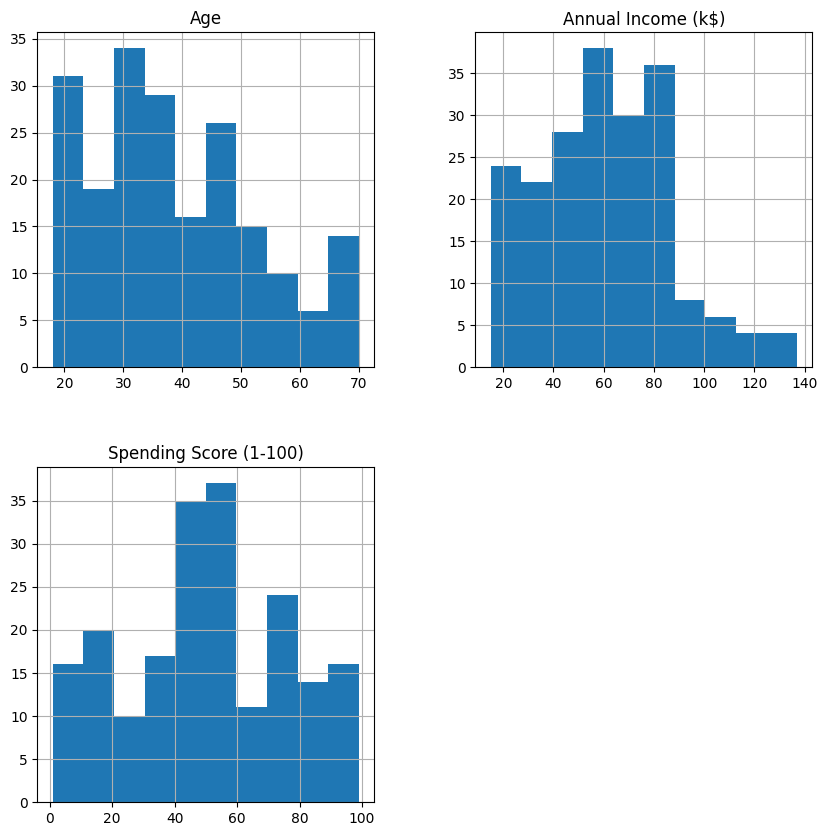

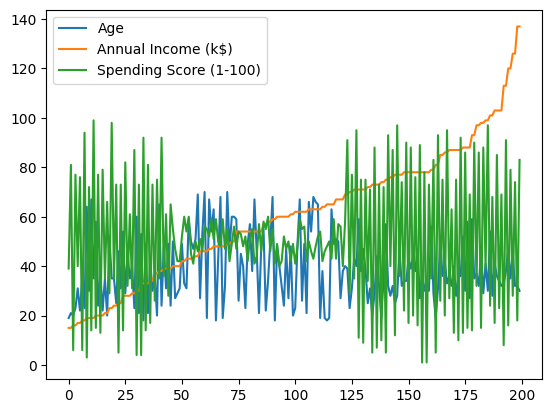

In [184]:
# dist
df.hist(figsize=(10, 10))
df.plot()

,0
Age,"Axes(0.125,0.53;0.352273x0.35)"
Annual Income (k$),"Axes(0.547727,0.53;0.352273x0.35)"
Spending Score (1-100),"Axes(0.125,0.11;0.352273x0.35)"


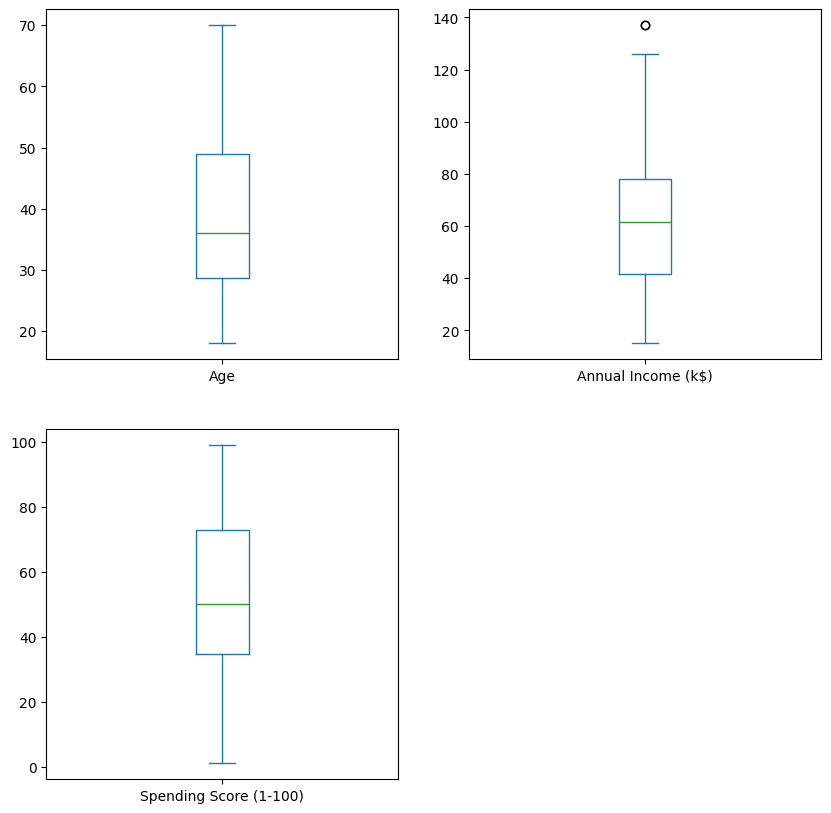

In [185]:
# box plots
df.plot(kind='box', subplots=True, layout=(2, 2), figsize=(10, 10))

In [186]:
df['Gender'] = df['Gender'].map({'Male': 0, 'Female': 1})

<Axes: >

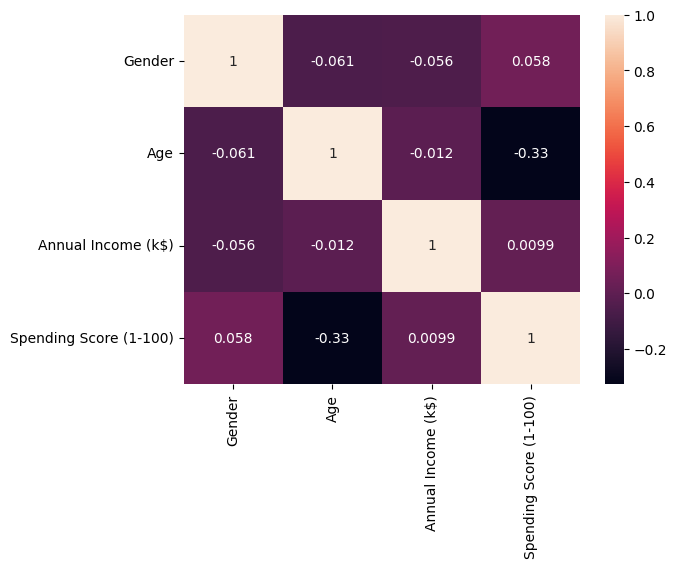

In [187]:
# corr
df.corr()
sns.heatmap(df.corr(), annot=True)

In [188]:
# min max scaling
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
df_scaled = scaler.fit_transform(df)
df_scaled = pd.DataFrame(df_scaled, columns=df.columns)

In [189]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score

In [190]:
def test_pair_scss(x):
  wcss = []
  silhouette_scores = []
  for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42, n_init=10)
    kmeans.fit(x)
    wcss.append(kmeans.inertia_)
    print(f'k={i}, wcss={kmeans.inertia_}')
  return wcss

def test_pair_sil(x):
  silhouette_scores = []
  for i in range(2, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42, n_init=10)
    kmeans.fit(x)
    silhouette_scores.append(silhouette_score(x, kmeans.labels_))
    print(f'k={i}, silhouette_score={silhouette_score(x, kmeans.labels_)}')
  return silhouette_scores

In [191]:
def plot_pair_wcss(wcss,pair):
  # elbow
   plt.figure(figsize=(12, 4))
   plt.subplot(1, 2, 1)
   plt.plot(range(1, 11), wcss, marker='o')
   f1 = pair[0].name
   f2 = pair[1].name
   plt.title(f'Elbow Method for {f1} and {f2}')
   plt.xlabel("Number of clusters (k)")
   plt.ylabel("WCSS")
def plot_pair_sil(silhouette_scores,pair):
  # sil
  plt.figure(figsize=(12, 4))
  plt.subplot(1, 2, 2)
  plt.plot(range(2, 11), silhouette_scores, marker='o')
  f1 = pair[0].name
  f2 = pair[1].name
  plt.title(f'Silhouette Score for {f1} and {f2}')
  plt.xlabel("Number of clusters (k)")
  plt.ylabel("Silhouette Score")

In [192]:
pair1 = [df_scaled['Annual Income (k$)'], df_scaled['Spending Score (1-100)']]

In [193]:
def test_pair(pair):
  x = np.array(pair).T
  Wcss = test_pair_scss(x)
  print()
  silhouette_scores = test_pair_sil(x)
  plot_pair_wcss(Wcss,pair)
  plot_pair_sil(silhouette_scores,pair)
  return x

k=1, wcss=23.040720326039906
k=2, wcss=13.993505283127979
k=3, wcss=9.058985215159455
k=4, wcss=6.110312266413655
k=5, wcss=3.583117905952559
k=6, wcss=3.1003435707513742
k=7, wcss=2.6260623772655123
k=8, wcss=2.218840260984673
k=9, wcss=1.8872721883620924
k=10, wcss=1.6923812485708147

k=2, silhouette_score=0.33340205479521
k=3, silhouette_score=0.4514909309424474
k=4, silhouette_score=0.49620078745146784
k=5, silhouette_score=0.5594854531227246
k=6, silhouette_score=0.535817696916733
k=7, silhouette_score=0.5168021892187427
k=8, silhouette_score=0.42983975856498574
k=9, silhouette_score=0.4416331298338993
k=10, silhouette_score=0.43244205960848203


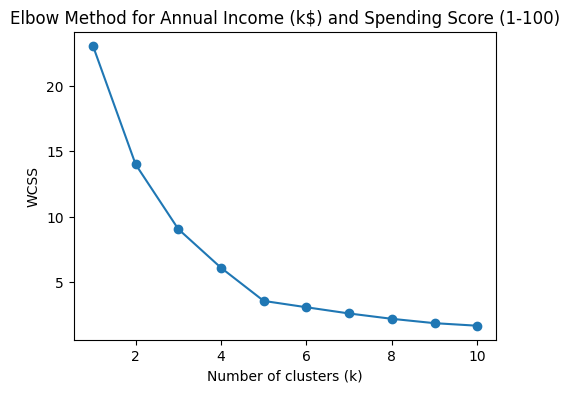

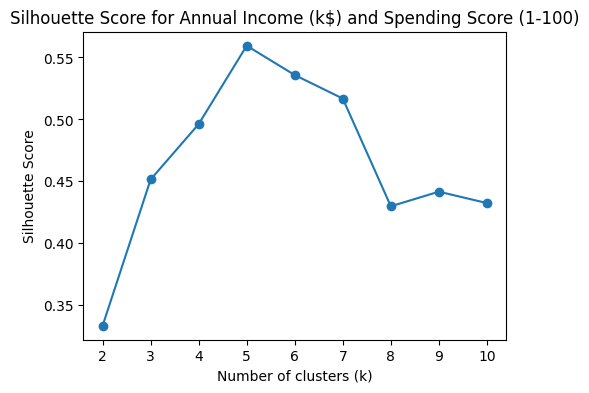

In [194]:
x1 = test_pair(pair1)

In [195]:
# try with k = 5
W_scores = []
sil_scores = []
kmeans_final = KMeans(n_clusters=5, init='k-means++', random_state=42, n_init=10)
kmeans_final.fit(x1)
W_scores.append(kmeans_final.inertia_)
sil_scores.append(silhouette_score(x1, kmeans_final.labels_))
print(f"WCss = {W_scores[-1]}")
print(f"Silhouette Score = {sil_scores[-1]}")

WCss = 3.583117905952559
Silhouette Score = 0.5594854531227246


In [196]:
pair2 = [df_scaled['Age'], df_scaled['Spending Score (1-100)']]

k=1, wcss=28.17833784431537
k=2, wcss=13.337690580804237
k=3, wcss=8.742042168276534
k=4, wcss=6.350049379567735
k=5, wcss=5.026143351352524
k=6, wcss=3.7561445337632247
k=7, wcss=3.2553107976472515
k=8, wcss=2.7756383026293605
k=9, wcss=2.4131304027911327
k=10, wcss=2.0261736157567216

k=2, silhouette_score=0.47252865228696783
k=3, silhouette_score=0.44058221683010546
k=4, silhouette_score=0.4359241957977821
k=5, silhouette_score=0.44625330587100703
k=6, silhouette_score=0.4554676382159921
k=7, silhouette_score=0.4097179595231675
k=8, silhouette_score=0.40386586157610954
k=9, silhouette_score=0.40564630857239803
k=10, silhouette_score=0.4417794652087249


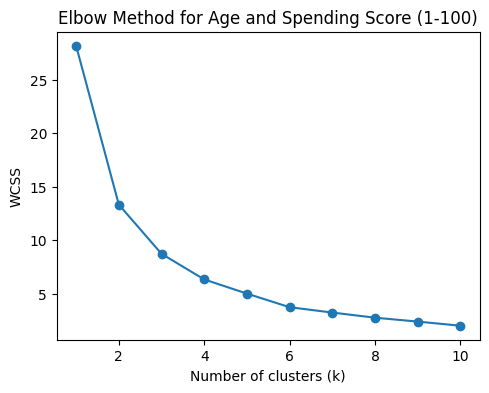

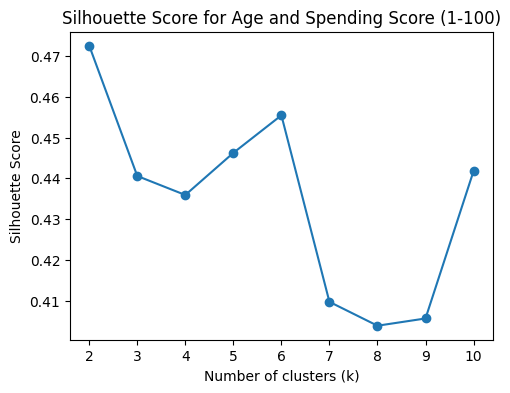

In [197]:
x2 = test_pair(pair2)

In [198]:
# try k = 2
kmeans_age = KMeans(n_clusters=2, init='k-means++', random_state=42, n_init=10)
kmeans_age.fit(x2)
W_scores.append(kmeans_age.inertia_)
sil_scores.append(silhouette_score(x2, kmeans_age.labels_))
print(f"WCss = {W_scores[-1]}")
print(f"Silhouette Score = {sil_scores[-1]}")

WCss = 13.337690580804237
Silhouette Score = 0.47252865228696783


k=1, wcss=23.583906150363603
k=2, wcss=13.028938428018277
k=3, wcss=7.493024843304993
k=4, wcss=6.055824667599621
k=5, wcss=4.729046373331375
k=6, wcss=3.865956392529677
k=7, wcss=3.054717436369359
k=8, wcss=2.642520343536073
k=9, wcss=2.3291765544665166
k=10, wcss=2.0958392462043833

k=2, silhouette_score=0.41300834916124046
k=3, silhouette_score=0.44037055449798856
k=4, silhouette_score=0.38494003748894784
k=5, silhouette_score=0.3797645101239645
k=6, silhouette_score=0.38474544979708497
k=7, silhouette_score=0.4028980682771093
k=8, silhouette_score=0.411161159279936
k=9, silhouette_score=0.40304147223669273
k=10, silhouette_score=0.4029039138019794


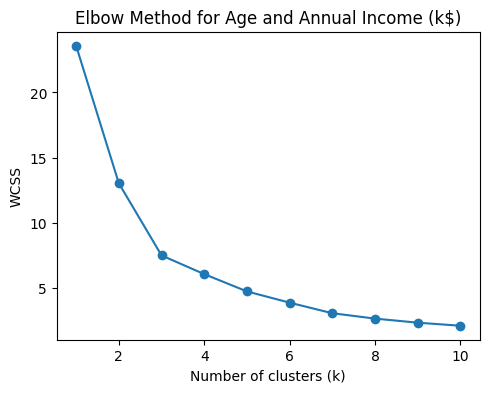

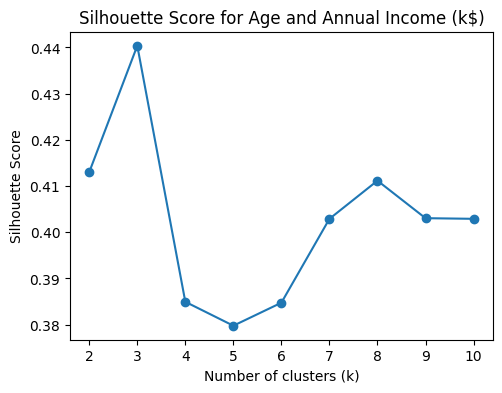

In [199]:
pair3 = [df_scaled['Age'], df_scaled['Annual Income (k$)']]
x3 = test_pair(pair3)

In [200]:
# try k = 3
k_means_age_income = KMeans(n_clusters=3, init='k-means++', random_state=42, n_init=10)
k_means_age_income.fit(x3)
W_scores.append(k_means_age_income.inertia_)
sil_scores.append(silhouette_score(x3, k_means_age_income.labels_))
print(f"WCss = {W_scores[-1]}")
print(f"Silhouette Score = {sil_scores[-1]}")

WCss = 7.493024843304993
Silhouette Score = 0.44037055449798856


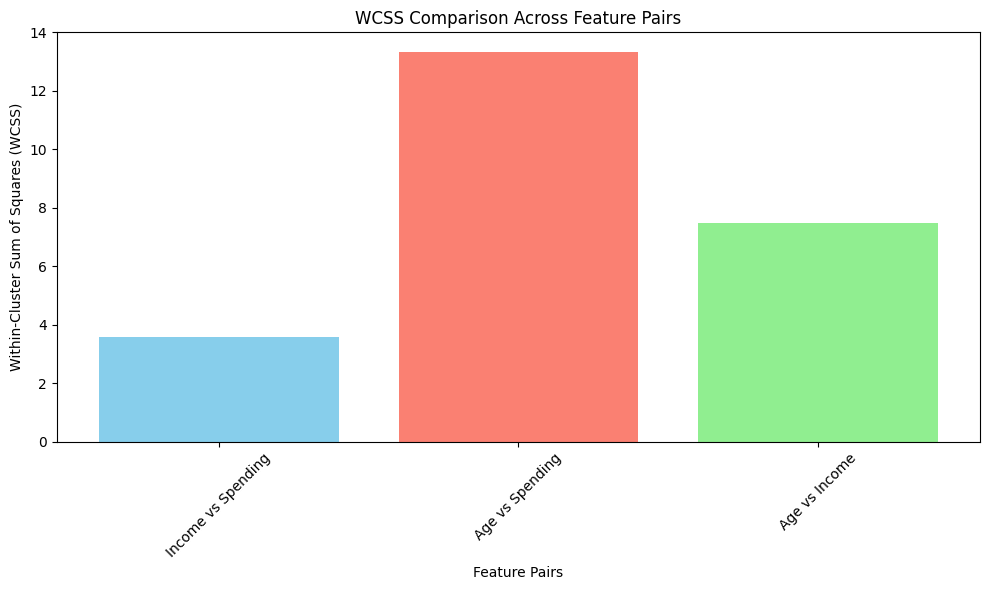

In [206]:
pair_names = ["Income vs Spending", "Age vs Spending", "Age vs Income"]
plt.figure(figsize=(10, 6))
bars = plt.bar(pair_names, W_scores, color=['skyblue', 'salmon', 'lightgreen'])
plt.title("WCSS Comparison Across Feature Pairs")
plt.ylabel("Within-Cluster Sum of Squares (WCSS)")
plt.xlabel("Feature Pairs")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

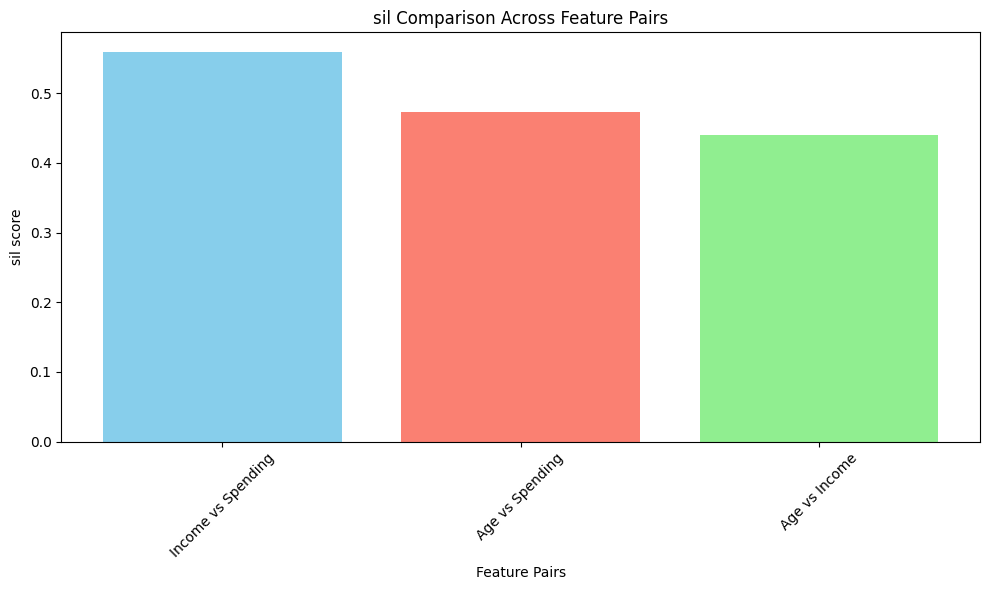

In [207]:
# same with sil
plt.figure(figsize=(10, 6))
bars = plt.bar(pair_names, sil_scores, color=['skyblue', 'salmon', 'lightgreen'])
plt.title("sil Comparison Across Feature Pairs")
plt.ylabel("sil score")
plt.xlabel("Feature Pairs")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()